# data loading

In [39]:
#data collected from Road traffic statistics: https://roadtraffic.dft.gov.uk/downloads
#file contains data for number of vehicles that travel past the count point (in both directions) on an average day of the year.
import pandas as pd

df = pd.read_csv('dft_traffic_counts_aadf.csv')
df.head()





,Count_point_id,Year,Region_id,Region_name,Region_ons_code,Local_authority_id,Local_authority_name,Local_authority_code,Road_name,Road_category,...,Buses_and_coaches,LGVs,HGVs_2_rigid_axle,HGVs_3_rigid_axle,HGVs_4_or_more_rigid_axle,HGVs_3_or_4_articulated_axle,HGVs_5_articulated_axle,HGVs_6_articulated_axle,All_HGVs,All_motor_vehicles
0,6750,2014,6,London,E12000007,96,Islington,E09000019,A201,PA,...,787,1728,204,74,132,15,6,18,449,11916
1,8352,2014,6,London,E12000007,104,Lewisham,E09000023,A2,PA,...,430,1415,258,36,58,6,11,22,390,9426
2,6807,2014,6,London,E12000007,178,Kingston upon Thames,E09000021,A240,PA,...,175,1589,251,35,13,2,4,19,325,12951
3,16544,2014,5,North West,E12000002,85,Manchester,E08000003,A57,PA,...,911,1931,239,53,105,25,107,47,576,16107
4,27765,2014,6,London,E12000007,57,Barnet,E09000003,A5109,PA,...,302,1651,246,12,12,0,1,1,273,19276


# EDA-analysis

In [4]:
# looking at the columns we will work with
df.columns

Index(['Count_point_id', 'Year', 'Region_id', 'Region_name', 'Region_ons_code',
       'Local_authority_id', 'Local_authority_name', 'Local_authority_code',
       'Road_name', 'Road_category', 'Road_type', 'Start_junction_road_name',
       'End_junction_road_name', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Link_length_km', 'Link_length_miles', 'Estimation_method',
       'Estimation_method_detailed', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles'],
      dtype='object')

In [6]:
#checking data quality in regards to null values
df.isnull().sum()

Count_point_id                       0
Year                                 0
Region_id                            0
Region_name                          0
Region_ons_code                      0
Local_authority_id                   0
Local_authority_name                 0
Local_authority_code                 0
Road_name                            0
Road_category                        0
Road_type                            0
Start_junction_road_name        121975
End_junction_road_name          121964
Easting                              0
Northing                             0
Latitude                             0
Longitude                            0
Link_length_km                  121499
Link_length_miles               121499
Estimation_method                    0
Estimation_method_detailed           0
Pedal_cycles                         0
Two_wheeled_motor_vehicles           0
Cars_and_taxis                       0
Buses_and_coaches                    0
LGVs                     

Text(0.5, 1.0, 'UK daily traffic average (mileage)')

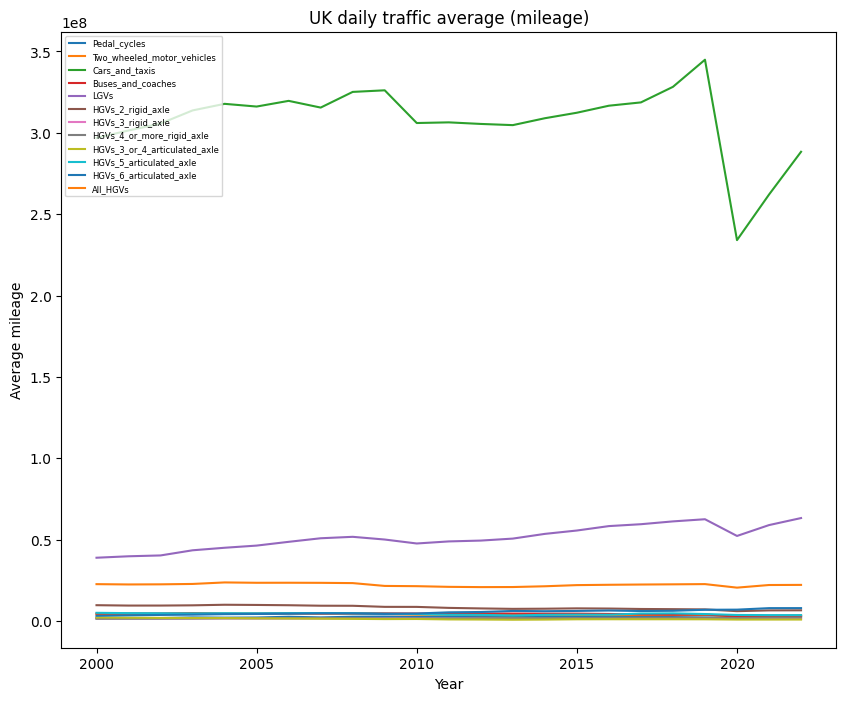

In [38]:
#list of vehicle types in the data

veh_lst = ['Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs']
#look at the average mileage of a road junction in the view of different type of vehicles
import matplotlib.pyplot  as plt
veh_df = df.groupby('Year')[veh_lst].sum()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(veh_df, label = veh_lst)
ax.legend(loc = 'upper left', prop={'size': 6})
plt.xlabel('Year')
plt.ylabel('Average mileage')
plt.title('UK daily traffic average (mileage)')

